# 1. Setup Mario

In [2]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
import torch
torch.cuda.is_available()

d:\Programing\Ananconda\envs\fai\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [4]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# 2. Preprocess Environment

In [5]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [6]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [7]:
state = env.reset()

In [8]:
state, reward, done, info = env.step([5])

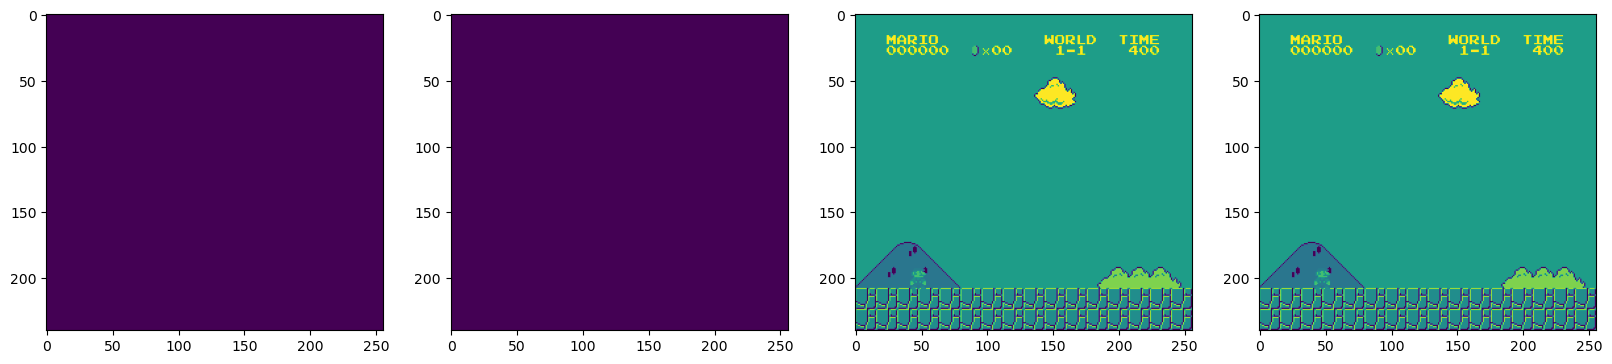

In [9]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model

In [10]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

# 4. Test it Out

In [11]:
# Load model
model = PPO.load('./train/best_model_520000')

In [12]:
state = env.reset()

In [12]:
# Start the game 
state = env.reset()
# Loop through the game
i=1
scr_lst=[]
x_ax=[]
sum=0
while i<=100000: 
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    #env.render()
    sum+=info[0]['score']
    if(i%1000 == 0):
        x_ax.append(i)
        avg=sum/i
        scr_lst.append(avg)
        
    i+=1
    
    

In [13]:
print(len(scr_lst))

100


In [14]:
from matplotlib import pyplot as plt

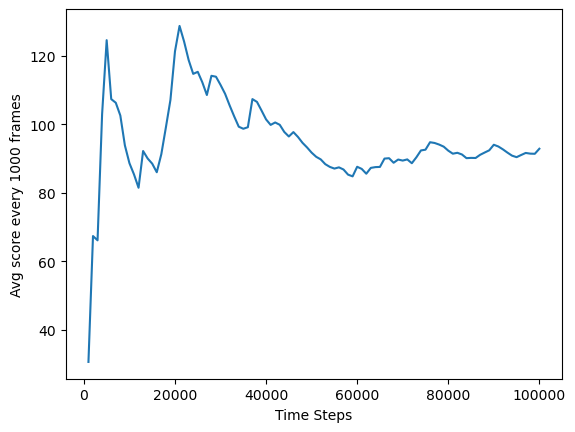

In [15]:

plt.plot(x_ax,scr_lst)
plt.xlabel("Time Steps")
plt.ylabel("Avg score every 1000 frames")
plt.show()

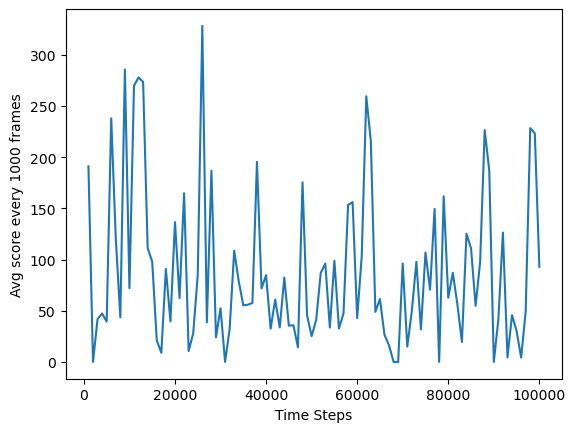

In [13]:
# Start the game 
state = env.reset()
# Loop through the game
i=1
scr_lst=[]
x_ax=[]
sum=0
while i<=100000: 
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    #env.render()
    sum+=info[0]['score']
    if(i%1000 == 0):
        x_ax.append(i)
        avg=sum/1000
        scr_lst.append(avg)
        
        sum=0
    i+=1
    

plt.plot(x_ax,scr_lst)
plt.xlabel("Time Steps")
plt.ylabel("Avg score every 1000 frames")
plt.show()
    

In [ ]:
plt.plot(x_ax,scr_lst)
plt.xlabel("Time Steps")
plt.ylabel("Avg score every 1000 frames")
plt.show()
    